<a href="https://colab.research.google.com/github/PedroTrichez/PORTIFOLIO/blob/main/C%C3%B3pia_de_%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *BERLIM*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade BERLIM, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [51]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [52]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/PedroTrichez/dados/main/listings.csv')


## Análise dos Dados


**Dicionário das variáveis**

* `id` - Número de id para cada imóvel
* `name` - Nome do imóvel
* `host_id` - Número de id do proprietário do imóvel 
* `host_name` - Nome do proprietário do imóvel 
* `neighbourhood_group` - Nome do distrito administrativo em que o imóvel encontra-se
* `neighbourhood` - Nome da rua, praça ou bairro em que o imóvel encontra-se
* `latitude` - Latitude em que o imóvel encontra-se
* `logitude` - Longitude em que o imóvel encontra-se
* `room_type` - O tipo de imovel sendo alugado
* `price` - Preço para alugar por uma noite o imóvel
* `minimum_nights` - Número mínimo de noites para reservar o imóvel
* `number_of_reviews` - Números de avaliações do imóvel
* `last_review` - Última avaliação do imóvel
* `reviews_per_month` - Média de números de avaliações por mês
* `calculated_host_listings_count` - Quantidade de imóveis que um anfritão possui
* `availability_365` - Número de dias que o imóvel estava disponível nos últimos 365 dias
* `number_of_reviews_ltm` - Número de avaliações nos últimos 12 meses
* `license` - Informações sobre o proprietário do imóvel





Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [53]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83,63,147,2021-01-01,0.88,1,303,0,First name and Last name: Nicolas Krotz Conta...
1,251423,2-room I 50 m² I Comfort I Balcony,1023063,Raja Jooseppi,Mitte,Brunnenstr. Nord,52.53867,13.39712,Entire home/apt,100,3,14,2023-01-29,0.11,8,93,10,01/Z/NA/003420-15
2,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.09,1,0,0,03/Z/RA/003410-18
3,251486,I 2 Room I 41 m² I Balcony,1023063,Raja Jooseppi,Mitte,Brunnenstr. Süd,52.53667,13.39505,Entire home/apt,108,3,31,2023-03-14,0.24,8,104,28,01/Z/ZA/006181-16
4,251493,2-room I 41 m² I Terrace > Mitte,1023063,Raja Jooseppi,Mitte,Brunnenstr. Nord,52.53881,13.39654,Entire home/apt,98,3,15,2023-02-26,0.12,8,98,13,01/Z/ZA/006180-16


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

#####  O DataFrame possui 12049 entradas e 18 variáveis. 



In [66]:
# identificar o volume de dados do DataFrame
print(f'Número de entradas: {df.shape[0]} ')
print(f'Número de variáveis: {df.shape[1]} ')


# verificar as 5 primeiras entradas do dataset
print(df.dtypes[0:5])



Número de entradas: 12049 
Número de variáveis: 18 
id                      int64
name                   object
host_id                 int64
host_name              object
neighbourhood_group    object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**





* A variável `license` possui 42.17% dos valores nulos;
* É possível perceber que quase todas as variáveis não possuem valores nulos;
* As variáveis `reviews_per_month` e `last_review` possuem aproximadamente 18.9% dos valores nulos.

In [55]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

display((df.isnull().sum()/df.shape[0]).sort_values(ascending=False))

license                           0.421778
reviews_per_month                 0.188895
last_review                       0.188895
name                              0.001162
host_name                         0.000830
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

* É possível perceber que as variáveis `price` e `minimum_nigths` possuem outliers;
* As variáveis `latitude` e `longitude` possuem uma distribuição bem simétrica e no centro do gráfico.



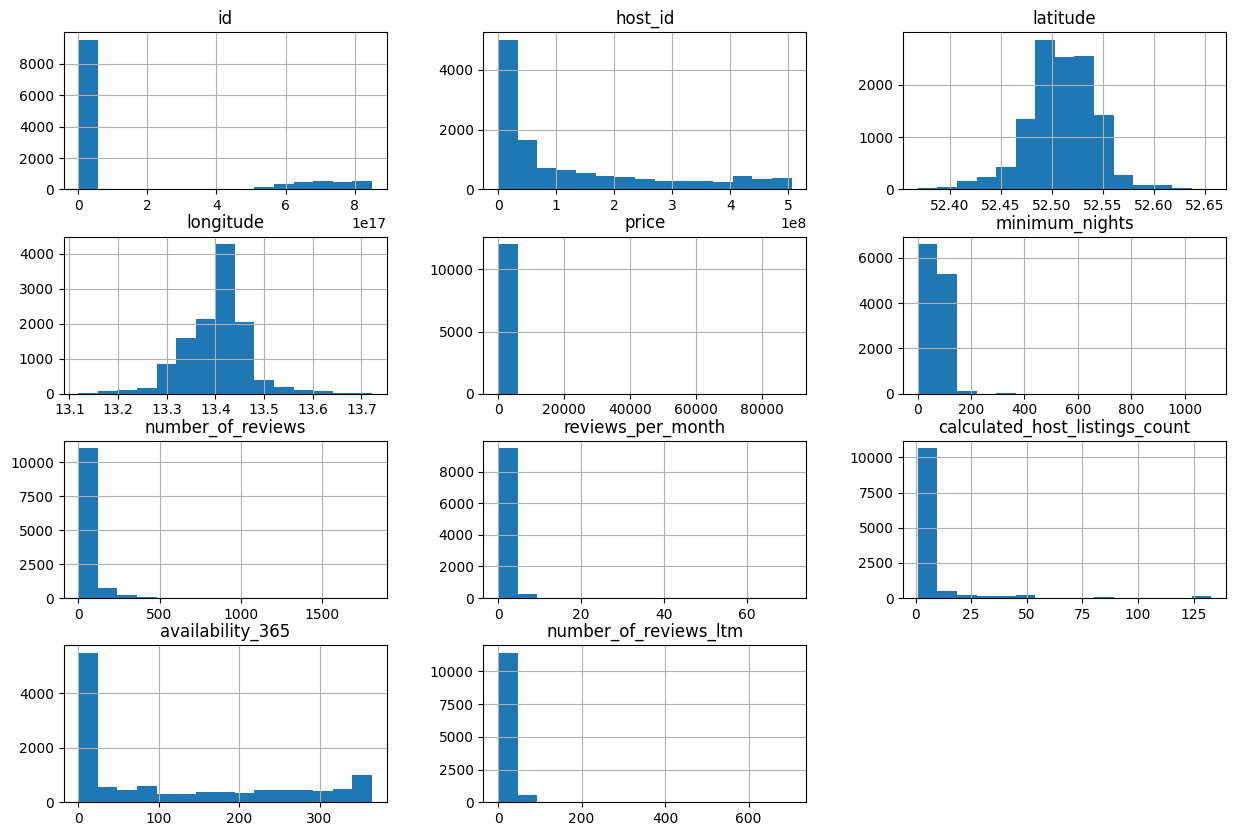

In [56]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15, figsize=(15,10));


### Como as variáveis `price` e `minimum_nights` possuem outilers que atrapalham muito a média, resolvi tirar eles utilizando o método do intervalo interquartil.

In [57]:

# identificando os outliers para as variáveis
def outliers_iqr(df,variavel):
    try:
        df[f'{variavel}']
        q1_var = df[f'{variavel}'].quantile(.25)
        q3_var = df[f'{variavel}'].quantile(.75)
        IQR_var = q3_var - q1_var

        # definindo os limites                                       
        sup_var = q3_var + 1.5 * IQR_var
        inf_var = q1_var - 1.5 * IQR_var

        return sup_var, inf_var
        
    except:
        print('ESSA VARIAVEL NÃO EXISTE NO DATASET')


# Criando uma cópia do Dataframe
df_clean = df.copy()

# Retirando os outliers do DataFrame
df_clean.drop(df_clean[df_clean.price > outliers_iqr(df,'price')[0]].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)


df_clean.drop(df_clean[df_clean.minimum_nights > outliers_iqr(df,'minimum_nights')[0]].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights == 0.0].index, axis=0, inplace=True)




### **Q4. Qual a média dos preços de aluguel?**

* Podemos ver que a média do preço é bastante diferente no DataFrame com outliers e sem.

In [58]:
# ver a média da coluna `price``
print(f'O valor médio dos preços com outliers: {df.price.mean()}')
print(f'O valor médio dos preços sem outliers: {df_clean.price.mean()}')

O valor médio dos preços com outliers: 109.13503195285917
O valor médio dos preços sem outliers: 82.2741054115988


### **Q4. Qual a correlação existente entre as variáveis**

* As variáveis quase não possuem correlação entre si.

In [59]:
# criar uma matriz de correlação
correlacao = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month',
                       'calculated_host_listings_count','availability_365']].corr()

# mostrar a matriz de correlação
correlacao


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.390870,0.082738,0.132184,0.217670,0.303488
minimum_nights,-0.390870,1.000000,-0.288321,-0.352723,-0.040110,-0.234673
number_of_reviews,0.082738,-0.288321,1.000000,0.678745,-0.041086,0.133672
reviews_per_month,0.132184,-0.352723,0.678745,1.000000,0.085569,0.267320
calculated_host_listings_count,0.217670,-0.040110,-0.041086,0.085569,1.000000,0.265107
availability_365,0.303488,-0.234673,0.133672,0.267320,0.265107,1.000000


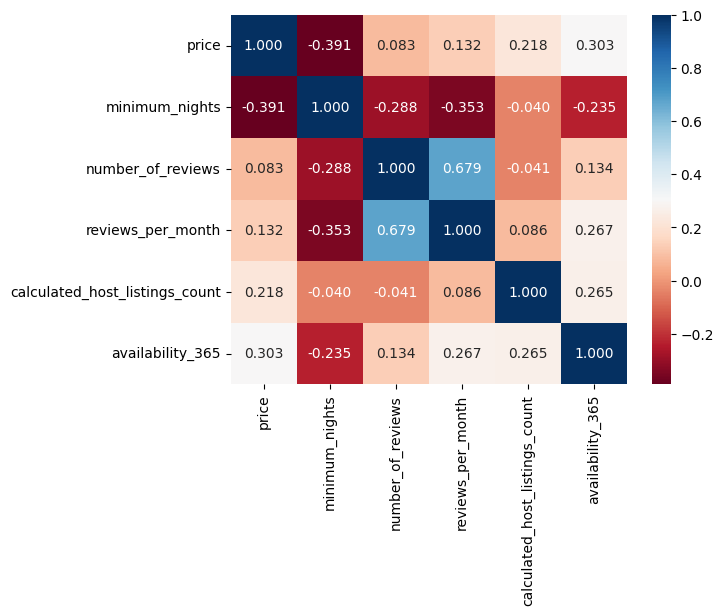

In [60]:
# plotar um heatmap a partir das correlações
sns.heatmap(correlacao, cmap='RdBu', fmt='.3f', linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

### O tipo de imóvel mais alugado é o `Entire home/apt` com 63.4% de todos os ids.

In [61]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()





Entire home/apt    7200
Private room       3911
Shared room         142
Hotel room           93
Name: room_type, dtype: int64

In [62]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]


Entire home/apt    0.634585
Private room       0.344703
Shared room        0.012515
Hotel room         0.008197
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



### A localidade mais cara é a de `Marzahn-Nord`, porém ela só possui um imóvel nesse local, trazendo uma média maior. Já o distrido de `Niederschöneweide` possui mais de 70 imóveis nessa região e tem o terceiro maior preço médio, sendo assim um dado mais acurado.


In [68]:
# ver preços por bairros, na média
display(df_clean.groupby('neighbourhood').mean()['price'].sort_values(ascending=False))



<ipython-input-68-a96ec4bbfa59>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(df_clean.groupby('neighbourhood').mean()['price'].sort_values(ascending=False))


neighbourhood
Marzahn-Nord         150.000000
Forst Grunewald      144.500000
Niederschöneweide    115.301370
Müggelheim           115.125000
Regierungsviertel    112.493056
                        ...    
Baumschulenweg        47.428571
Köpenick-Süd          44.476190
Gropiusstadt          42.777778
Allende-Viertel       42.500000
Marzahn-Mitte         30.800000
Name: price, Length: 136, dtype: float64

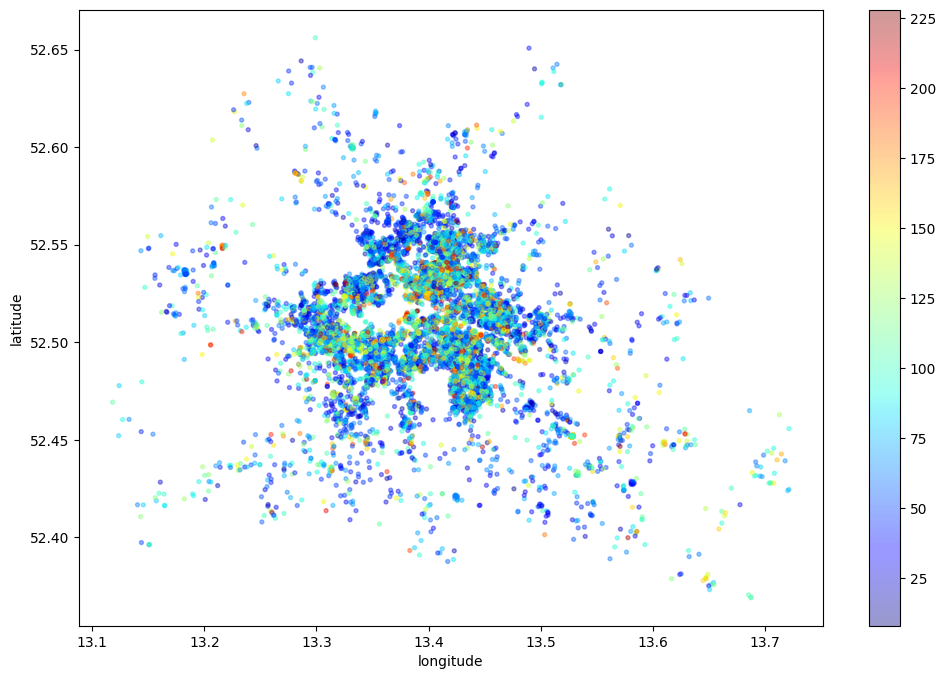

In [64]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));



### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [65]:
# ver a média da coluna `minimum_nights``
print(f'O valor médio da variável minimum_nights: {df_clean.minimum_nights.mean()}')


O valor médio da variável minimum_nights: 46.46210118103296


## Conclusões


#### Com a análise desse Dataset é possivel perceber:
* Existem outliers nas variáveis `price` e `minimum_nights`;
* A maioria dos imóveis estão centralizados em um local;
* Existem regiões com apenas um imóvel, o que pode acabar distorcendo algumas informações;
* Existem dois principais tipos de tipos de imóveis sendo eles `Entire home/apt` e `Private room`;
* As variáveis não possuem correlação entre si;



